In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

try: # When on google Colab, let's clone the notebook so we download the cache.
    import google.colab
    repo_path = 'dspy'
    !git -C $repo_path pull origin || git clone https://github.com/stanfordnlp/dspy $repo_path
except:
    repo_path = '.'

if repo_path not in sys.path:
    sys.path.append(repo_path)

# Set up the cache for this notebook
os.environ["DSP_NOTEBOOK_CACHEDIR"] = os.path.join(repo_path, 'cache')

import pkg_resources # Install the package if it's not installed
if not "dspy-ai" in {pkg.key for pkg in pkg_resources.working_set}:
    !pip install -U pip
    !pip install dspy-ai
    # !pip install -e $repo_path

import dspy

/tmp/ipykernel_352964/1818627631.py:20: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources # Install the package if it's not installed


In [2]:
from datasets import load_dataset
from imdb import Imdb, imdb_metric

# dataset = load_dataset("imdb")
dataset = Imdb()

100%|██████████| 25000/25000 [00:00<00:00, 70011.02it/s]


In [3]:
# dataset.train[0]

In [4]:
from dspy.evaluate.evaluate import Evaluate

# Set up the `evaluate_on_hotpotqa` function. We'll use this many times below.
evaluate_imdb = Evaluate(devset=dataset.dev, num_threads=1, display_progress=True, display_table=10, metric=imdb_metric)

example_descriptions = {'inputs': {'text': "movie review to analyse sentiment"}, 'outputs': {'answer': 'sentiment of a movie review, positive or negative'}}

In [5]:
from llama_cpp import Llama

llama = Llama(model_path='openhermes-2.5-mistral-7b.Q4_K_M.gguf', n_ctx=3900, n_gpu_layers=35, chat_format="chatml", verbose=False)
lm = dspy.dsp.modules.LlamaCpp(model='openhermes-2.5-mistral-7b.Q4_K_M', llama_model=llama, model_type='chat')
colbertv2_wiki17_abstracts = dspy.ColBERTv2(url='http://20.102.90.50:2017/wiki17_abstracts')

dspy.settings.configure(lm=lm, rm=colbertv2_wiki17_abstracts)

llama_model_loader: loaded meta data with 20 key-value pairs and 291 tensors from openhermes-2.5-mistral-7b.Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = teknium_openhermes-2.5-mistral-7b
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 l

['__init__.py', 'model_backends.py', 'hf_tasks.py', 'json_schema_to_grammar.py', 'tests', '.pytest_cache', '__pycache__', 'constants.py', 'autogoal_core', 'algorithms.py', 'algorithms_base.py', 'auto_dspy.py', 'signatures.py', 'utils.py', 'test_notebook.ipynb', 'my_field.py', 'assertion.log', 'local_cache', 'cache', 'zephyr-7b-beta.Q5_K_M.gguf', 'memory.py', 'prompts.py', 'measure_time.txt', 'measure_time2.txt', 'exceptions.txt', 'test_g8mk.ipynb', 'run_gsm8k.py', 'test_imdb.ipynb', 'imdb.py', 'openhermes-2.5-mistral-7b.Q4_K_M.gguf', 'exceptions_hotpot.txt', 'measure_time_hotpot.txt', 'measure_time_hotpot2.txt', 'exceptions_hotpot2.txt', 'exceptions_gsm8k.txt', 'measure_time_gsm8k.txt', 'measure_time_gsm8k_2.txt', 'exceptions_gsm8k.txt_2']


llama_build_graph: non-view tensors processed: 676/676
llama_new_context_with_model: compute buffer total size = 278.56 MiB


In [6]:
from auto_dspy import AutoDspy
from autogoal_core.search import PESearch
auto_ds = AutoDspy(
    lm=lm,
    path_to_llm="zephyr-7b-beta.Q5_K_M.gguf",
    search_algorithm=PESearch,
    metric=imdb_metric,
    random_state = 42,
    evaluator=evaluate_imdb

) 

./cache/compiler


pipeline space DspyPipelineSpace(graph=<autogoal_core.grammar._graph.Graph object at 0x7f4a37d75f60>, path_to_llm='zephyr-7b-beta.Q5_K_M.gguf', examples_description={'inputs': {'text': 'movie revie to analyse sentiment'}, 'outputs': {'answer': 'sentiment of a movie review, positive or negative'}})


  0%|          | 0/30 [00:00<?, ?it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (538 > 512). Running this sequence through the model will result in indexing errors


Failed to run or to evaluate example Example({'text': "According to the book The Last of the Cowboy Heroes which is about Joel McCrea, Audie Murphy, and Randolph Scott, the author says that Albuquerque was the only film he personally did not review because he claimed it was lost. Hadn't been seen in years.<br /><br />Good thing for western fans somebody was doing some spring cleaning at Paramount because a print was apparently found and now it's out on the open market. Albuquerque is a pretty good western too with Scott involved in a family feud with Uncle George Cleveland.<br /><br />George Cleveland sends for his nephew Randolph Scott with the intention of making him part of his freighting business, headquartered in the fast growing settlement of Albuquerque. Cleveland is more than just a business owner, he's the town boss which he runs from a wheelchair. He even has the sheriff in his pocket. <br /><br />Randolph Scott is not a cowboy hero for nothing. That includes not backing rela

 33%|███▎      | 10/30 [25:50<55:27, 166.35s/it] Token indices sequence length is longer than the specified maximum sequence length for this model (774 > 512). Running this sequence through the model will result in indexing errors


Failed to run or to evaluate example Example({'text': 'Japanese Tomo Akiyama\'s Keko Mask (1993) is extremely enjoyable trash film and so fun to watch! There are also some sequels, but I haven\'t seen them since these films are hyper rare. Some kind of re-releases some day would be nice since I think many trash lovers would like these films. The tongue in cheek story is about one extremely strict school in which teachers think that it is okay to torture students in order to attain discipline, which is, according to the teachers, the most important thing in education. The school is lead by incredibly funny looking (just look at the costume!) human wizard/whatever, who is like principal in the school, and it only adds to the campiness that it is never explained why he wears such a costume since all other teachers are perfectly normally clothed. Well, the main thing about the film is its name, Keko Mask, who is some beautiful and masked fairy, who comes always to save the girls and studen

 40%|████      | 12/30 [29:44<43:05, 143.65s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (545 > 512). Running this sequence through the model will result in indexing errors


Failed to run or to evaluate example Example({'text': 'There is one detail, which is not very common for Jackie Chan movies, but which is present here. It has some very tough and serious atmosphere about it while the funny elements are present too. Jackie is menacing and psychotic here. He is not a hero who is attacked and only then fights back (in a usual laid-back pattern), but he is the one who can go and start the tumult. His manner of hitting that evil guy in the glasses is amazing. Every time it goes "crack!". I also especially enjoy the scene when Jackie goes to the pub and thrashes the villains who had fronted on his girlfriend. It\'s one of the best blitzkriegs put on screen. Besides, the whole scene is shot with the background of some action character painted on the wall (it also looks like a poster of "rabochiy" from our Soviet era) and some lines in Russian on the left (I noticed that quite accidentally). That looks terrific (and nostalgic for Russian people). I also like w

 73%|███████▎  | 22/30 [54:08<22:03, 165.49s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (1376 > 512). Running this sequence through the model will result in indexing errors


Failed to run or to evaluate example Example({'text': 'As with all of Angelopoulos\' films, "The Suspended Step of the Stork" implicitly demands a close and intimate participation on the part of the viewer, a fact that has certainly contributed to the limited popularity of his work. Dialogues are sparing, with no monologues or exchanges exteriorizing the characters\' inner conflicts, doubts, or feelings. The filmmaker prefers to keep the viewers away from their own emotional responses, and instead forces them to explore and study the characters\' identities for themselves. As a result, the acting is understated and implicit, as opposed to overt and explicit.<br /><br />The action scenes are set between long intervals of contemplation, where the viewer is asked to become a participant, to participate as an actor, by probing his or her own psyche. As in a novel, where the drama rests entirely on the author\'s writing to provide a template where the reader\'s imagination and/or past exper

100%|██████████| 30/30 [1:14:40<00:00, 149.35s/it]


Bootstrapped 0 full traces after 30 examples in round 0.


 47%|████▋     | 14/30 [13:11<15:04, 56.53s/it]


Bootstrapped 4 full traces after 15 examples in round 0.


Average Metric: 1 / 19  (5.3):  76%|███████▌  | 19/25 [20:14<05:34, 55.72s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (1364 > 1024). Running this sequence through the model will result in indexing errors


Error for example in dev set: 		 index out of range in self


Average Metric: 2.0 / 25  (8.0): 100%|██████████| 25/25 [25:38<00:00, 61.55s/it]


Average Metric: 2.0 / 25  (8.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,text,example_answer,pred_answer,imdb_metric,answer
0,I'm not sure as to call this movie a children's drama or a fantasy film. When I first watched this I couldn't really make out...,positive,"Positive Reasoning: Let's think step by step in order to analyze the sentiment of this text. First, we can see that the author is unsure...",❌ [False],nan
1,"Okay so I love Aidan Quinn's acting even with a bad script. This is not the case in The Assignment. As other viewers have said,...",positive,Positive Reasoning: Let's think step by step in order to analyze the sentiment of the text. The text starts with the user expressing their love...,❌ [False],nan
2,"This is an all-around superb film. A moving experience filled with real life emotion. There's lessons to be learned here about love, sex, work, religion...",positive,Positive,✔️ [True],nan
3,"I tend to like Historical (period) films and get new ideas for costumes for my historical group, and a friend recommended this one to me....",positive,"Positive Reasoning: The text expresses positive sentiments towards the film, mentioning that the reviewer liked it, found the acting and comedy aspects enjoyable, and appreciated...",❌ [False],nan
4,"How 'Thursday' managed to avoid attention remains a mystery. A potent mix of comedy and crime, this one takes chances where Tarantino plays it safe...",positive,"Positive Reasoning: Let's think step by step in order to analyze the sentiment of the text. Firstly, we can see that the text mentions a...",❌ [False],nan
5,"I went into this film expecting a slasher, and while Mute Witness does take influence from said style of film-making, this is much more than...",positive,Positive Reasoning: Let's think step by step in order to analyze the sentiment of the text. The reviewer starts by mentioning their initial expectation and...,❌ [False],nan
6,Homecoming; what a HUGE disappointment!! After reading the plot summary (the dead coming back to vote - AGAINST George W. Bush!!!!!) I couldn't wait to...,negative,"Negative Reasoning: Let's think step by step in order to analyze the sentiment of the given text. The text starts with ""Homecoming; what a HUGE...",❌ [False],nan
7,My ratings: Acting - 3/10 Suspense - 2/10 Character Attachment - 1/10 Plot - 2/10 Character Development - 2/10 Overall - 2/10This show...,negative,Text: My ratings: Acting - 3/10 Suspense - 2/10 Character Attachment - 1/10 Plot - 2/10 Character Development - 2/10 Overall - 2/10This...,❌ [False],nan
8,Milo is an overlooked & underrated horror flick from the late 90's but the feel and atmosphere is more that of an 80's horror flick....,positive,Text: Milo is an overlooked & underrated horror flick from the late 90's but the feel and atmosphere is more that of an 80's horror...,❌ [False],nan
9,this movie is sooooo bad that it forced me to create an account with IMDb just to warn others about it.i have been...,negative,"Negative Reasoning: Let's think step by step in order to analyze the sentiment of this text. Firstly, the author states that the movie is ""sooooo...",❌ [False],nan


  0%|          | 0/30 [00:00<?, ?it/s]

Failed to run or to evaluate example Example({'text': "According to the book The Last of the Cowboy Heroes which is about Joel McCrea, Audie Murphy, and Randolph Scott, the author says that Albuquerque was the only film he personally did not review because he claimed it was lost. Hadn't been seen in years.<br /><br />Good thing for western fans somebody was doing some spring cleaning at Paramount because a print was apparently found and now it's out on the open market. Albuquerque is a pretty good western too with Scott involved in a family feud with Uncle George Cleveland.<br /><br />George Cleveland sends for his nephew Randolph Scott with the intention of making him part of his freighting business, headquartered in the fast growing settlement of Albuquerque. Cleveland is more than just a business owner, he's the town boss which he runs from a wheelchair. He even has the sheriff in his pocket. <br /><br />Randolph Scott is not a cowboy hero for nothing. That includes not backing rela

  3%|▎         | 1/30 [00:02<01:05,  2.25s/it]
Process Process-6:
thread '<unnamed>' panicked at /home/runner/work/tokenizers/tokenizers/tokenizers/src/tokenizer/encoding.rs:319:9:
`stride` must be strictly less than `max_len=1` (note that `max_len` may be shorter than the max length of the original model, as it subtracts the number of special characters
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace
Traceback (most recent call last):
  File "/home/daniel/miniconda3/envs/ai/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/daniel/miniconda3/envs/ai/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/daniel/Documents/Github/autogoal-core/auto_dspy/autogoal_core/utils/_process.py", line 46, in _restricted_function
    result = self.function(*args, **kwargs)
  File "/home/daniel/Documents/Github/autogoal-core/auto_dspy/auto_dspy.py", line 71, i

Failed to run or to evaluate example Example({'text': "According to the book The Last of the Cowboy Heroes which is about Joel McCrea, Audie Murphy, and Randolph Scott, the author says that Albuquerque was the only film he personally did not review because he claimed it was lost. Hadn't been seen in years.<br /><br />Good thing for western fans somebody was doing some spring cleaning at Paramount because a print was apparently found and now it's out on the open market. Albuquerque is a pretty good western too with Scott involved in a family feud with Uncle George Cleveland.<br /><br />George Cleveland sends for his nephew Randolph Scott with the intention of making him part of his freighting business, headquartered in the fast growing settlement of Albuquerque. Cleveland is more than just a business owner, he's the town boss which he runs from a wheelchair. He even has the sheriff in his pocket. <br /><br />Randolph Scott is not a cowboy hero for nothing. That includes not backing rela

 33%|███▎      | 10/30 [07:31<15:50, 47.53s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (774 > 512). Running this sequence through the model will result in indexing errors


Failed to run or to evaluate example Example({'text': 'Japanese Tomo Akiyama\'s Keko Mask (1993) is extremely enjoyable trash film and so fun to watch! There are also some sequels, but I haven\'t seen them since these films are hyper rare. Some kind of re-releases some day would be nice since I think many trash lovers would like these films. The tongue in cheek story is about one extremely strict school in which teachers think that it is okay to torture students in order to attain discipline, which is, according to the teachers, the most important thing in education. The school is lead by incredibly funny looking (just look at the costume!) human wizard/whatever, who is like principal in the school, and it only adds to the campiness that it is never explained why he wears such a costume since all other teachers are perfectly normally clothed. Well, the main thing about the film is its name, Keko Mask, who is some beautiful and masked fairy, who comes always to save the girls and studen

 40%|████      | 12/30 [08:15<10:51, 36.22s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (545 > 512). Running this sequence through the model will result in indexing errors


Failed to run or to evaluate example Example({'text': 'There is one detail, which is not very common for Jackie Chan movies, but which is present here. It has some very tough and serious atmosphere about it while the funny elements are present too. Jackie is menacing and psychotic here. He is not a hero who is attacked and only then fights back (in a usual laid-back pattern), but he is the one who can go and start the tumult. His manner of hitting that evil guy in the glasses is amazing. Every time it goes "crack!". I also especially enjoy the scene when Jackie goes to the pub and thrashes the villains who had fronted on his girlfriend. It\'s one of the best blitzkriegs put on screen. Besides, the whole scene is shot with the background of some action character painted on the wall (it also looks like a poster of "rabochiy" from our Soviet era) and some lines in Russian on the left (I noticed that quite accidentally). That looks terrific (and nostalgic for Russian people). I also like w

 73%|███████▎  | 22/30 [14:49<05:45, 43.15s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (1376 > 512). Running this sequence through the model will result in indexing errors


Failed to run or to evaluate example Example({'text': 'As with all of Angelopoulos\' films, "The Suspended Step of the Stork" implicitly demands a close and intimate participation on the part of the viewer, a fact that has certainly contributed to the limited popularity of his work. Dialogues are sparing, with no monologues or exchanges exteriorizing the characters\' inner conflicts, doubts, or feelings. The filmmaker prefers to keep the viewers away from their own emotional responses, and instead forces them to explore and study the characters\' identities for themselves. As a result, the acting is understated and implicit, as opposed to overt and explicit.<br /><br />The action scenes are set between long intervals of contemplation, where the viewer is asked to become a participant, to participate as an actor, by probing his or her own psyche. As in a novel, where the drama rests entirely on the author\'s writing to provide a template where the reader\'s imagination and/or past exper

100%|██████████| 30/30 [20:07<00:00, 40.25s/it]


Bootstrapped 0 full traces after 30 examples in round 0.


Average Metric: 0 / 19  (0.0):  76%|███████▌  | 19/25 [13:59<04:09, 41.60s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (1388 > 512). Running this sequence through the model will result in indexing errors


Error for example in dev set: 		 The size of tensor a (1388) must match the size of tensor b (512) at non-singleton dimension 1


Average Metric: 0.0 / 23  (0.0):  92%|█████████▏| 23/25 [16:02<01:15, 37.60s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (573 > 512). Running this sequence through the model will result in indexing errors


Error for example in dev set: 		 The size of tensor a (573) must match the size of tensor b (512) at non-singleton dimension 1


Average Metric: 0.0 / 25  (0.0): 100%|██████████| 25/25 [16:48<00:00, 40.33s/it]


Average Metric: 0.0 / 25  (0.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,text,example_answer,pred_answer,imdb_metric,answer
0,I'm not sure as to call this movie a children's drama or a fantasy film. When I first watched this I couldn't really make out...,positive,h,❌ [False],nan
1,"Okay so I love Aidan Quinn's acting even with a bad script. This is not the case in The Assignment. As other viewers have said,...",positive,A,❌ [False],nan
2,"This is an all-around superb film. A moving experience filled with real life emotion. There's lessons to be learned here about love, sex, work, religion...",positive,c,❌ [False],nan
3,"I tend to like Historical (period) films and get new ideas for costumes for my historical group, and a friend recommended this one to me....",positive,b,❌ [False],nan
4,"How 'Thursday' managed to avoid attention remains a mystery. A potent mix of comedy and crime, this one takes chances where Tarantino plays it safe...",positive,c,❌ [False],nan
5,"I went into this film expecting a slasher, and while Mute Witness does take influence from said style of film-making, this is much more than...",positive,T,❌ [False],nan
6,Homecoming; what a HUGE disappointment!! After reading the plot summary (the dead coming back to vote - AGAINST George W. Bush!!!!!) I couldn't wait to...,negative,D,❌ [False],nan
7,My ratings: Acting - 3/10 Suspense - 2/10 Character Attachment - 1/10 Plot - 2/10 Character Development - 2/10 Overall - 2/10This show...,negative,C,❌ [False],nan
8,Milo is an overlooked & underrated horror flick from the late 90's but the feel and atmosphere is more that of an 80's horror flick....,positive,c,❌ [False],nan
9,this movie is sooooo bad that it forced me to create an account with IMDb just to warn others about it.i have been...,negative,S,❌ [False],nan


100%|██████████| 30/30 [22:28<00:00, 44.93s/it]


Bootstrapped 0 full traces after 30 examples in round 0.


Average Metric: 0 / 25  (0.0): 100%|██████████| 25/25 [20:17<00:00, 48.68s/it]


Average Metric: 0 / 25  (0.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,text,example_answer,pred_answer,imdb_metric
0,I'm not sure as to call this movie a children's drama or a fantasy film. When I first watched this I couldn't really make out...,positive,"Children's film | A children's film, or family film, is a film genre that contains children or relates to them in the context of home...",❌ [False]
1,"Okay so I love Aidan Quinn's acting even with a bad script. This is not the case in The Assignment. As other viewers have said,...",positive,"Aidan Foster | Aidan Foster is a fictional character from the Australian soap opera ""Neighbours"", played by Bobby Morley. Both the character and Morley's casting...",❌ [False]
2,"This is an all-around superb film. A moving experience filled with real life emotion. There's lessons to be learned here about love, sex, work, religion...",positive,Love the Hard Way | Love the Hard Way is a 2001 crime drama film directed by . It is about the story of a...,❌ [False]
3,"I tend to like Historical (period) films and get new ideas for costumes for my historical group, and a friend recommended this one to me....",positive,"Regency reenactment | Regency reenactment is historical reenactment of the British Regency period. Groups portray the period from 1811 to 1820 through costume, manners, food,...",❌ [False]
4,"How 'Thursday' managed to avoid attention remains a mystery. A potent mix of comedy and crime, this one takes chances where Tarantino plays it safe...",positive,"Thursday (film) | Thursday is a 1998 American crime/thriller/black comedy film written and directed by Skip Woods and starring Thomas Jane, Aaron Eckhart, Paula Marshall,...",❌ [False]
5,"I went into this film expecting a slasher, and while Mute Witness does take influence from said style of film-making, this is much more than...",positive,"Teesri Aankh: The Hidden Camera | Teesri Aankh (English: ""The Third Eye"") is a 2006 Bollywood film starring Sunny Deol and Amisha Patel, and directed...",❌ [False]
6,Homecoming; what a HUGE disappointment!! After reading the plot summary (the dead coming back to vote - AGAINST George W. Bush!!!!!) I couldn't wait to...,negative,"Homecoming (Masters of Horror) | ""Homecoming"" is the sixth episode of the first season of ""Masters of Horror"". It originally aired in North America on...",❌ [False]
7,My ratings: Acting - 3/10 Suspense - 2/10 Character Attachment - 1/10 Plot - 2/10 Character Development - 2/10 Overall - 2/10This show...,negative,"My Family (series 10) | The tenth series of the BBC family sitcom ""My Family"" originally aired between 9 July 2010, and 27 August 2010,...",❌ [False]
8,Milo is an overlooked & underrated horror flick from the late 90's but the feel and atmosphere is more that of an 80's horror flick....,positive,Bad Milo! | Bad Milo! is a 2013 American horror comedy film written by Jacob Vaughan and Benjamin Hayes and directed by Jacob Vaughan. The...,❌ [False]
9,this movie is sooooo bad that it forced me to create an account with IMDb just to warn others about it.i have been...,negative,Die Bad | Die Bad () is a 2000 South Korean film. It was the debut film of director Ryoo Seung-wan and starred the director...,❌ [False]


  0%|          | 0/30 [00:00<?, ?it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (538 > 512). Running this sequence through the model will result in indexing errors


Failed to run or to evaluate example Example({'text': "According to the book The Last of the Cowboy Heroes which is about Joel McCrea, Audie Murphy, and Randolph Scott, the author says that Albuquerque was the only film he personally did not review because he claimed it was lost. Hadn't been seen in years.<br /><br />Good thing for western fans somebody was doing some spring cleaning at Paramount because a print was apparently found and now it's out on the open market. Albuquerque is a pretty good western too with Scott involved in a family feud with Uncle George Cleveland.<br /><br />George Cleveland sends for his nephew Randolph Scott with the intention of making him part of his freighting business, headquartered in the fast growing settlement of Albuquerque. Cleveland is more than just a business owner, he's the town boss which he runs from a wheelchair. He even has the sheriff in his pocket. <br /><br />Randolph Scott is not a cowboy hero for nothing. That includes not backing rela

 33%|███▎      | 10/30 [18:15<37:30, 112.54s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (774 > 512). Running this sequence through the model will result in indexing errors


Failed to run or to evaluate example Example({'text': 'Japanese Tomo Akiyama\'s Keko Mask (1993) is extremely enjoyable trash film and so fun to watch! There are also some sequels, but I haven\'t seen them since these films are hyper rare. Some kind of re-releases some day would be nice since I think many trash lovers would like these films. The tongue in cheek story is about one extremely strict school in which teachers think that it is okay to torture students in order to attain discipline, which is, according to the teachers, the most important thing in education. The school is lead by incredibly funny looking (just look at the costume!) human wizard/whatever, who is like principal in the school, and it only adds to the campiness that it is never explained why he wears such a costume since all other teachers are perfectly normally clothed. Well, the main thing about the film is its name, Keko Mask, who is some beautiful and masked fairy, who comes always to save the girls and studen

 40%|████      | 12/30 [19:58<25:39, 85.52s/it] Token indices sequence length is longer than the specified maximum sequence length for this model (545 > 512). Running this sequence through the model will result in indexing errors


Failed to run or to evaluate example Example({'text': 'There is one detail, which is not very common for Jackie Chan movies, but which is present here. It has some very tough and serious atmosphere about it while the funny elements are present too. Jackie is menacing and psychotic here. He is not a hero who is attacked and only then fights back (in a usual laid-back pattern), but he is the one who can go and start the tumult. His manner of hitting that evil guy in the glasses is amazing. Every time it goes "crack!". I also especially enjoy the scene when Jackie goes to the pub and thrashes the villains who had fronted on his girlfriend. It\'s one of the best blitzkriegs put on screen. Besides, the whole scene is shot with the background of some action character painted on the wall (it also looks like a poster of "rabochiy" from our Soviet era) and some lines in Russian on the left (I noticed that quite accidentally). That looks terrific (and nostalgic for Russian people). I also like w

 73%|███████▎  | 22/30 [36:50<14:41, 110.19s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (1376 > 512). Running this sequence through the model will result in indexing errors


Failed to run or to evaluate example Example({'text': 'As with all of Angelopoulos\' films, "The Suspended Step of the Stork" implicitly demands a close and intimate participation on the part of the viewer, a fact that has certainly contributed to the limited popularity of his work. Dialogues are sparing, with no monologues or exchanges exteriorizing the characters\' inner conflicts, doubts, or feelings. The filmmaker prefers to keep the viewers away from their own emotional responses, and instead forces them to explore and study the characters\' identities for themselves. As a result, the acting is understated and implicit, as opposed to overt and explicit.<br /><br />The action scenes are set between long intervals of contemplation, where the viewer is asked to become a participant, to participate as an actor, by probing his or her own psyche. As in a novel, where the drama rests entirely on the author\'s writing to provide a template where the reader\'s imagination and/or past exper

100%|██████████| 30/30 [50:26<00:00, 100.90s/it]


Bootstrapped 0 full traces after 30 examples in round 0.


Average Metric: 0 / 19  (0.0):  76%|███████▌  | 19/25 [39:22<11:21, 113.60s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (1388 > 512). Running this sequence through the model will result in indexing errors


Error for example in dev set: 		 The size of tensor a (1388) must match the size of tensor b (512) at non-singleton dimension 1


Average Metric: 0.0 / 23  (0.0):  92%|█████████▏| 23/25 [45:39<03:47, 113.80s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (573 > 512). Running this sequence through the model will result in indexing errors


Error for example in dev set: 		 The size of tensor a (573) must match the size of tensor b (512) at non-singleton dimension 1


Average Metric: 0.0 / 25  (0.0): 100%|██████████| 25/25 [48:19<00:00, 115.98s/it]


Average Metric: 0.0 / 25  (0.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,text,example_answer,pred_answer,imdb_metric,answer
0,I'm not sure as to call this movie a children's drama or a fantasy film. When I first watched this I couldn't really make out...,positive,What text or content would you like me to summarize?,❌ [False],nan
1,"Okay so I love Aidan Quinn's acting even with a bad script. This is not the case in The Assignment. As other viewers have said,...",positive,What text or content would you like me to summarize?,❌ [False],nan
2,"This is an all-around superb film. A moving experience filled with real life emotion. There's lessons to be learned here about love, sex, work, religion...",positive,What text or content would you like me to summarize?,❌ [False],nan
3,"I tend to like Historical (period) films and get new ideas for costumes for my historical group, and a friend recommended this one to me....",positive,What text or content would you like me to summarize?,❌ [False],nan
4,"How 'Thursday' managed to avoid attention remains a mystery. A potent mix of comedy and crime, this one takes chances where Tarantino plays it safe...",positive,What text or content would you like me to summarize?,❌ [False],nan
5,"I went into this film expecting a slasher, and while Mute Witness does take influence from said style of film-making, this is much more than...",positive,What text or content would you like me to summarize?,❌ [False],nan
6,Homecoming; what a HUGE disappointment!! After reading the plot summary (the dead coming back to vote - AGAINST George W. Bush!!!!!) I couldn't wait to...,negative,What is the main topic or theme of the text?,❌ [False],nan
7,My ratings: Acting - 3/10 Suspense - 2/10 Character Attachment - 1/10 Plot - 2/10 Character Development - 2/10 Overall - 2/10This show...,negative,What text or content would you like me to summarize?,❌ [False],nan
8,Milo is an overlooked & underrated horror flick from the late 90's but the feel and atmosphere is more that of an 80's horror flick....,positive,What text or content would you like me to summarize?,❌ [False],nan
9,this movie is sooooo bad that it forced me to create an account with IMDb just to warn others about it.i have been...,negative,What is the main topic or theme of the text?,❌ [False],nan


  0%|          | 0/30 [00:00<?, ?it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (538 > 512). Running this sequence through the model will result in indexing errors


Failed to run or to evaluate example Example({'text': "According to the book The Last of the Cowboy Heroes which is about Joel McCrea, Audie Murphy, and Randolph Scott, the author says that Albuquerque was the only film he personally did not review because he claimed it was lost. Hadn't been seen in years.<br /><br />Good thing for western fans somebody was doing some spring cleaning at Paramount because a print was apparently found and now it's out on the open market. Albuquerque is a pretty good western too with Scott involved in a family feud with Uncle George Cleveland.<br /><br />George Cleveland sends for his nephew Randolph Scott with the intention of making him part of his freighting business, headquartered in the fast growing settlement of Albuquerque. Cleveland is more than just a business owner, he's the town boss which he runs from a wheelchair. He even has the sheriff in his pocket. <br /><br />Randolph Scott is not a cowboy hero for nothing. That includes not backing rela

 33%|███▎      | 10/30 [00:07<00:14,  1.38it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (774 > 512). Running this sequence through the model will result in indexing errors


Failed to run or to evaluate example Example({'text': 'Japanese Tomo Akiyama\'s Keko Mask (1993) is extremely enjoyable trash film and so fun to watch! There are also some sequels, but I haven\'t seen them since these films are hyper rare. Some kind of re-releases some day would be nice since I think many trash lovers would like these films. The tongue in cheek story is about one extremely strict school in which teachers think that it is okay to torture students in order to attain discipline, which is, according to the teachers, the most important thing in education. The school is lead by incredibly funny looking (just look at the costume!) human wizard/whatever, who is like principal in the school, and it only adds to the campiness that it is never explained why he wears such a costume since all other teachers are perfectly normally clothed. Well, the main thing about the film is its name, Keko Mask, who is some beautiful and masked fairy, who comes always to save the girls and studen

 40%|████      | 12/30 [00:09<00:13,  1.35it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (545 > 512). Running this sequence through the model will result in indexing errors


Failed to run or to evaluate example Example({'text': 'There is one detail, which is not very common for Jackie Chan movies, but which is present here. It has some very tough and serious atmosphere about it while the funny elements are present too. Jackie is menacing and psychotic here. He is not a hero who is attacked and only then fights back (in a usual laid-back pattern), but he is the one who can go and start the tumult. His manner of hitting that evil guy in the glasses is amazing. Every time it goes "crack!". I also especially enjoy the scene when Jackie goes to the pub and thrashes the villains who had fronted on his girlfriend. It\'s one of the best blitzkriegs put on screen. Besides, the whole scene is shot with the background of some action character painted on the wall (it also looks like a poster of "rabochiy" from our Soviet era) and some lines in Russian on the left (I noticed that quite accidentally). That looks terrific (and nostalgic for Russian people). I also like w

 73%|███████▎  | 22/30 [00:17<00:06,  1.21it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (1376 > 512). Running this sequence through the model will result in indexing errors


Failed to run or to evaluate example Example({'text': 'As with all of Angelopoulos\' films, "The Suspended Step of the Stork" implicitly demands a close and intimate participation on the part of the viewer, a fact that has certainly contributed to the limited popularity of his work. Dialogues are sparing, with no monologues or exchanges exteriorizing the characters\' inner conflicts, doubts, or feelings. The filmmaker prefers to keep the viewers away from their own emotional responses, and instead forces them to explore and study the characters\' identities for themselves. As a result, the acting is understated and implicit, as opposed to overt and explicit.<br /><br />The action scenes are set between long intervals of contemplation, where the viewer is asked to become a participant, to participate as an actor, by probing his or her own psyche. As in a novel, where the drama rests entirely on the author\'s writing to provide a template where the reader\'s imagination and/or past exper

100%|██████████| 30/30 [00:23<00:00,  1.28it/s]


Bootstrapped 0 full traces after 30 examples in round 0.


Average Metric: 0 / 19  (0.0):  76%|███████▌  | 19/25 [00:14<00:04,  1.44it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (1388 > 512). Running this sequence through the model will result in indexing errors


Error for example in dev set: 		 The size of tensor a (1388) must match the size of tensor b (512) at non-singleton dimension 1


Average Metric: 0.0 / 23  (0.0):  92%|█████████▏| 23/25 [00:17<00:01,  1.37it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (573 > 512). Running this sequence through the model will result in indexing errors


Error for example in dev set: 		 The size of tensor a (573) must match the size of tensor b (512) at non-singleton dimension 1


Average Metric: 0.0 / 25  (0.0): 100%|██████████| 25/25 [00:18<00:00,  1.34it/s]


Average Metric: 0.0 / 25  (0.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,text,example_answer,pred_answer,imdb_metric,answer
0,I'm not sure as to call this movie a children's drama or a fantasy film. When I first watched this I couldn't really make out...,positive,P,❌ [False],nan
1,"Okay so I love Aidan Quinn's acting even with a bad script. This is not the case in The Assignment. As other viewers have said,...",positive,P,❌ [False],nan
2,"This is an all-around superb film. A moving experience filled with real life emotion. There's lessons to be learned here about love, sex, work, religion...",positive,P,❌ [False],nan
3,"I tend to like Historical (period) films and get new ideas for costumes for my historical group, and a friend recommended this one to me....",positive,P,❌ [False],nan
4,"How 'Thursday' managed to avoid attention remains a mystery. A potent mix of comedy and crime, this one takes chances where Tarantino plays it safe...",positive,P,❌ [False],nan
5,"I went into this film expecting a slasher, and while Mute Witness does take influence from said style of film-making, this is much more than...",positive,P,❌ [False],nan
6,Homecoming; what a HUGE disappointment!! After reading the plot summary (the dead coming back to vote - AGAINST George W. Bush!!!!!) I couldn't wait to...,negative,N,❌ [False],nan
7,My ratings: Acting - 3/10 Suspense - 2/10 Character Attachment - 1/10 Plot - 2/10 Character Development - 2/10 Overall - 2/10This show...,negative,P,❌ [False],nan
8,Milo is an overlooked & underrated horror flick from the late 90's but the feel and atmosphere is more that of an 80's horror flick....,positive,P,❌ [False],nan
9,this movie is sooooo bad that it forced me to create an account with IMDb just to warn others about it.i have been...,negative,N,❌ [False],nan


  0%|          | 0/30 [00:00<?, ?it/s]Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Your max_length is set to 200, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)


Failed to run or to evaluate example Example({'text': "According to the book The Last of the Cowboy Heroes which is about Joel McCrea, Audie Murphy, and Randolph Scott, the author says that Albuquerque was the only film he personally did not review because he claimed it was lost. Hadn't been seen in years.<br /><br />Good thing for western fans somebody was doing some spring cleaning at Paramount because a print was apparently found and now it's out on the open market. Albuquerque is a pretty good western too with Scott involved in a family feud with Uncle George Cleveland.<br /><br />George Cleveland sends for his nephew Randolph Scott with the intention of making him part of his freighting business, headquartered in the fast growing settlement of Albuquerque. Cleveland is more than just a business owner, he's the town boss which he runs from a wheelchair. He even has the sheriff in his pocket. <br /><br />Randolph Scott is not a cowboy hero for nothing. That includes not backing rela

  3%|▎         | 1/30 [01:36<46:43, 96.69s/it]Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Your max_length is set to 200, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_le

Failed to run or to evaluate example Example({'text': 'Japanese Tomo Akiyama\'s Keko Mask (1993) is extremely enjoyable trash film and so fun to watch! There are also some sequels, but I haven\'t seen them since these films are hyper rare. Some kind of re-releases some day would be nice since I think many trash lovers would like these films. The tongue in cheek story is about one extremely strict school in which teachers think that it is okay to torture students in order to attain discipline, which is, according to the teachers, the most important thing in education. The school is lead by incredibly funny looking (just look at the costume!) human wizard/whatever, who is like principal in the school, and it only adds to the campiness that it is never explained why he wears such a costume since all other teachers are perfectly normally clothed. Well, the main thing about the film is its name, Keko Mask, who is some beautiful and masked fairy, who comes always to save the girls and studen

 37%|███▋      | 11/30 [19:21<26:01, 82.19s/it] Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Your max_length is set to 200, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_

Failed to run or to evaluate example Example({'text': 'There is one detail, which is not very common for Jackie Chan movies, but which is present here. It has some very tough and serious atmosphere about it while the funny elements are present too. Jackie is menacing and psychotic here. He is not a hero who is attacked and only then fights back (in a usual laid-back pattern), but he is the one who can go and start the tumult. His manner of hitting that evil guy in the glasses is amazing. Every time it goes "crack!". I also especially enjoy the scene when Jackie goes to the pub and thrashes the villains who had fronted on his girlfriend. It\'s one of the best blitzkriegs put on screen. Besides, the whole scene is shot with the background of some action character painted on the wall (it also looks like a poster of "rabochiy" from our Soviet era) and some lines in Russian on the left (I noticed that quite accidentally). That looks terrific (and nostalgic for Russian people). I also like w

 43%|████▎     | 13/30 [21:30<19:02, 67.24s/it]Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Your max_length is set to 200, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_l

Failed to run or to evaluate example Example({'text': 'As with all of Angelopoulos\' films, "The Suspended Step of the Stork" implicitly demands a close and intimate participation on the part of the viewer, a fact that has certainly contributed to the limited popularity of his work. Dialogues are sparing, with no monologues or exchanges exteriorizing the characters\' inner conflicts, doubts, or feelings. The filmmaker prefers to keep the viewers away from their own emotional responses, and instead forces them to explore and study the characters\' identities for themselves. As a result, the acting is understated and implicit, as opposed to overt and explicit.<br /><br />The action scenes are set between long intervals of contemplation, where the viewer is asked to become a participant, to participate as an actor, by probing his or her own psyche. As in a novel, where the drama rests entirely on the author\'s writing to provide a template where the reader\'s imagination and/or past exper

 77%|███████▋  | 23/30 [39:34<10:00, 85.77s/it] Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Your max_length is set to 200, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_

Bootstrapped 0 full traces after 30 examples in round 0.


  0%|          | 0/25 [00:00<?, ?it/s]Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Your max_length is set to 200, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)


Error for example in dev set: 		 The expanded size of the tensor (1364) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1364].  Tensor sizes: [1, 514]


Average Metric: 0.0 / 20  (0.0):  80%|████████  | 20/25 [39:26<07:25, 89.18s/it] Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Your max_length is set to 200, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manu

Error for example in dev set: 		 The expanded size of the tensor (548) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 548].  Tensor sizes: [1, 514]


Average Metric: 0.0 / 24  (0.0):  96%|█████████▌| 24/25 [45:52<01:20, 80.65s/it] Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Your max_length is set to 200, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manu

Average Metric: 0.0 / 25  (0.0%)


/home/daniel/Documents/Github/autogoal-core/dspy/dspy/evaluate/evaluate.py:126: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(truncate_cell)


,text,example_answer,pred_answer,imdb_metric,answer
0,I'm not sure as to call this movie a children's drama or a fantasy film. When I first watched this I couldn't really make out...,positive,"Fix leaks, take shorter showers, use drought-resistant plants, install low-flow fixtures, and recycle graywater.",❌ [False],nan
1,"Okay so I love Aidan Quinn's acting even with a bad script. This is not the case in The Assignment. As other viewers have said,...",positive,Probability,❌ [False],nan
2,"This is an all-around superb film. A moving experience filled with real life emotion. There's lessons to be learned here about love, sex, work, religion...",positive,Probability,❌ [False],nan
3,"I tend to like Historical (period) films and get new ideas for costumes for my historical group, and a friend recommended this one to me....",positive,Probability,❌ [False],nan
4,"How 'Thursday' managed to avoid attention remains a mystery. A potent mix of comedy and crime, this one takes chances where Tarantino plays it safe...",positive,"Fix leaks, take shorter showers, use drought-resistant plants, install low-flow fixtures, and recycle graywater.",❌ [False],nan
5,"I went into this film expecting a slasher, and while Mute Witness does take influence from said style of film-making, this is much more than...",positive,"Fix leaks, take shorter showers, use drought-resistant plants, install low-flow fixtures, and recycle graywater.",❌ [False],nan
6,Homecoming; what a HUGE disappointment!! After reading the plot summary (the dead coming back to vote - AGAINST George W. Bush!!!!!) I couldn't wait to...,negative,"Fix leaks, take shorter showers, use drought-resistant plants, install low-flow fixtures, and recycle graywater.",❌ [False],nan
7,My ratings: Acting - 3/10 Suspense - 2/10 Character Attachment - 1/10 Plot - 2/10 Character Development - 2/10 Overall - 2/10This show...,negative,"Fix leaks, take shorter showers, use drought-resistant plants, install low-flow fixtures, and recycle graywater.",❌ [False],nan
8,Milo is an overlooked & underrated horror flick from the late 90's but the feel and atmosphere is more that of an 80's horror flick....,positive,"Fix leaks, take shorter showers, use drought-resistant plants, install low-flow fixtures, and recycle graywater.",❌ [False],nan
9,this movie is sooooo bad that it forced me to create an account with IMDb just to warn others about it.i have been...,negative,"Fix leaks, take shorter showers, use drought-resistant plants, install low-flow fixtures, and recycle graywater.",❌ [False],nan


100%|██████████| 30/30 [1:05:52<00:00, 131.74s/it]


Bootstrapped 0 full traces after 30 examples in round 0.


Average Metric: 0 / 23  (0.0):  92%|█████████▏| 23/25 [52:18<04:44, 142.12s/it]

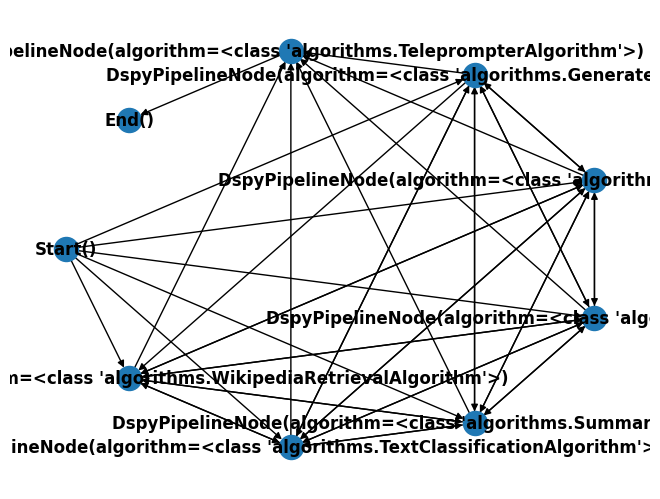

In [7]:
dataset_description = ""
auto_ds.fit(dataset_description=dataset_description, trainset=dataset.train, examples_descriptions=example_descriptions)